### TLBR Model: Clustering of bivalent receptors (BR) by trivalent ligands (TL) [Goldstein 1984, Biophy J](https://pubmed.ncbi.nlm.nih.gov/6204698/)
This model is a classic example of studying sol-gel transition in the context of ligand mediated (cell surface) receptor clustering. 

In [1]:
from molclustpy import * 

# bngl file (BioNetGen model) 
bng_file = 'TLBR_model.bngl'

# Initialization of the Simulation Object
simObj = BNG_multiTrials(bng_file, t_end=400.0, steps=40, numRuns=20)
print(simObj)
simObj.runTrials(delSim=False)
print()

# analyze data across multiple trials
outpath = simObj.getOutPath()
molecules, numSite, counts, _ = simObj.getMolecules()
nfsObj = NFSim_output_analyzer(outpath)
nfsObj.process_gdatfiles()
nfsObj.process_speciesfiles(molecules, counts, numSite)


***** // ***** 
Class : BNG_multiTrials
File Path : TLBR_model.bngl

t_end : 400.0 seconds 	 output_steps : 40
Number of runs: 20

Molecules: ['L', 'R']
Number of binding sites: [3, 2]
Species Counts: [300.0, 4200.0]

NFsim progress : [****************************************] 100%
Execution time : 33.2317 seconds

Processing gdat_files : [****************************************] 100%

Observables:  {0: 'time', 1: 'CrossLinkedReceptors'}

Processing species_files : [****************************************] 100%


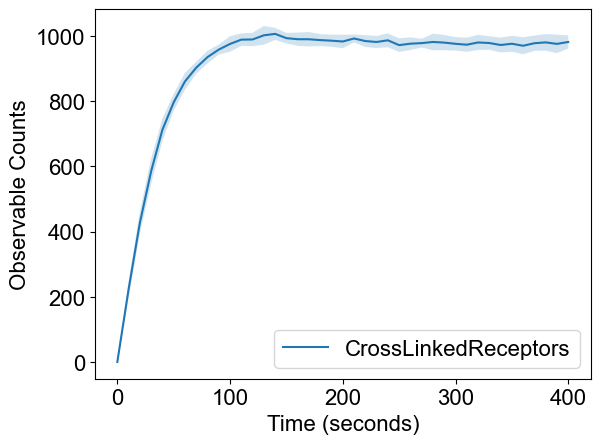

In [2]:
# Visualization 
plotTimeCourse(outpath, obsList=[])

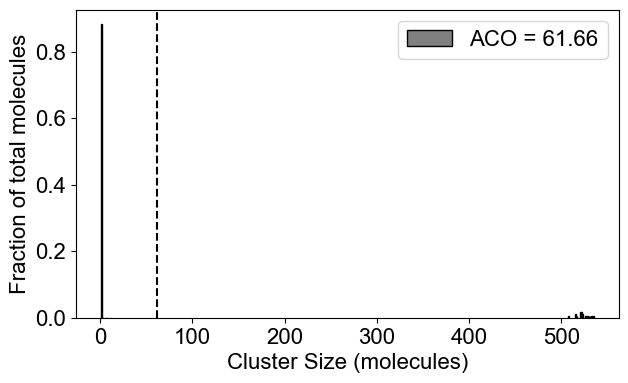

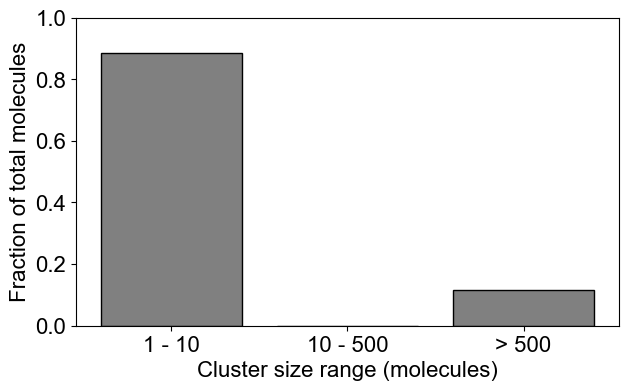

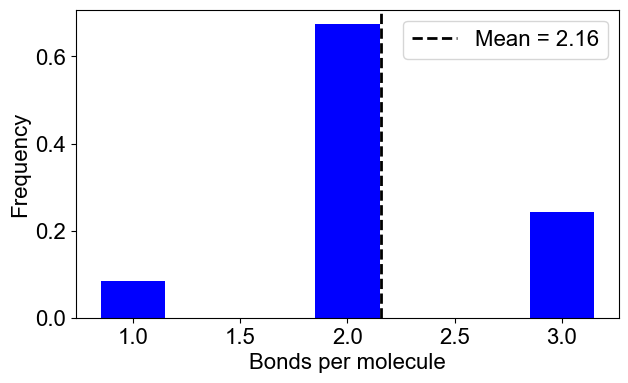

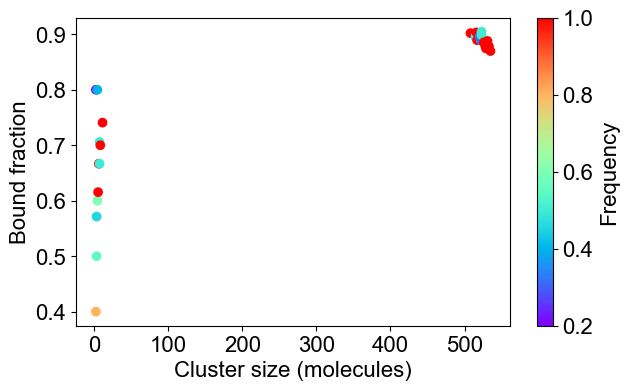

In [3]:
# 2A: Cluster size distribution (ACO: Average Cluster Occupancy)
plotClusterDist(outpath)
# You can plot a binned distribution by providing cluster size ranges
plotClusterDist(outpath, sizeRange=[1,10,500])
# 2B: Number of bonds per molecule
plotBondsPerMolecule(outpath)
# 2C: Bound fraction distribution
plotBoundFraction(outpath)

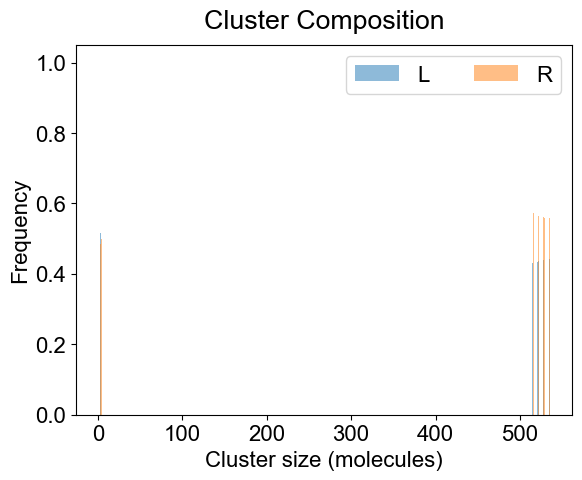

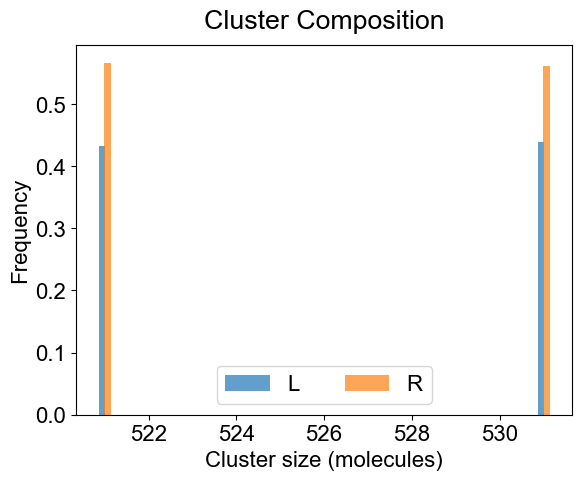

In [4]:
# 3A. Average composition of indivual clusters. 
# Default is all the clusters present in the system. As before, adjust width and transparency (alpha) for visual clarity.
plotClusterComposition(outpath, specialClusters=[], width=0.25, alpha=0.5)
# You can look at the composition of a set of clusters (specialClusters) also
plotClusterComposition(outpath, specialClusters=[521, 531], width=0.15, alpha=0.7)

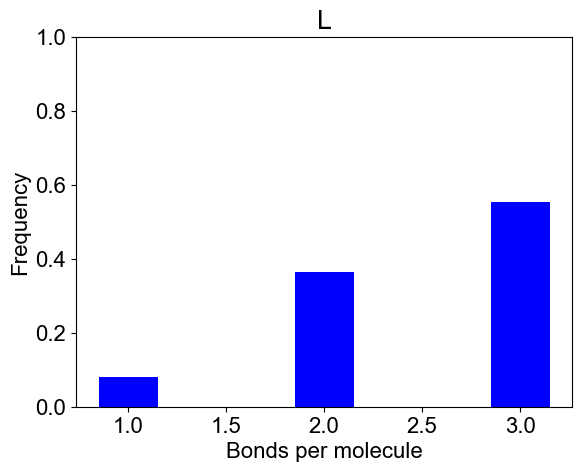

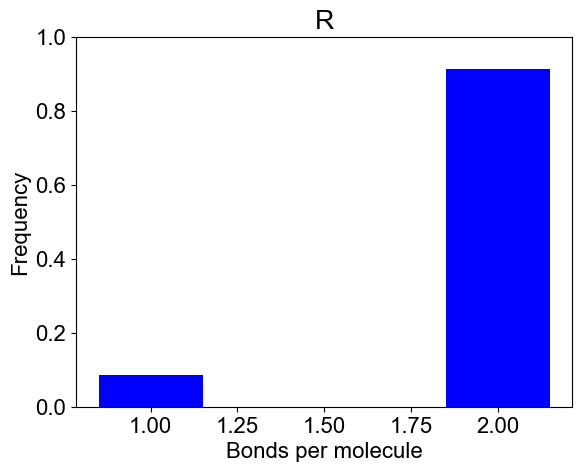

In [5]:
# 3B. Bondcount distribution of each molecular type 
# You may provide a subset of molecules also
plotBondCounts(outpath, molecules=['L'])
plotBondCounts(outpath, molecules=['R'])